In [2]:
# Importing libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

/Users/saurabhsmac/Humor-Analysis---NLP/Humor-Analysis---NLP/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [64]:
df = pd.read_csv('urls.csv')
df.head()

,URL
0,https://scrapsfromtheloft.com/comedy/pete-holm...
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...
2,https://scrapsfromtheloft.com/comedy/taylor-to...
3,https://scrapsfromtheloft.com/comedy/kevin-bri...
4,https://scrapsfromtheloft.com/comedy/jacquelin...


In [65]:
def get_transcript(link):
    max_retries = 5
    for attempt in range(max_retries):
        try:
            response = requests.get(link)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                transcript_div = soup.find('div', class_='elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content')
                
                if transcript_div:
                    transcript = transcript_div.get_text(separator=' ')
                    return transcript 
        except Exception as e:
            print(f'Error on attempt {attempt + 1} for {link}: {str(e)}')
        print(f'Retrying {attempt + 1}/{max_retries} for {link}')
    
    return None  # All retries failed; returns None


In [66]:
df['transcript'] = df['URL'].apply(get_transcript)

Retrying 1/5 for https://scrapsfromtheloft.com/comedy/jeff-dunham-im-with-cupid-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/kelsey-cook-the-hustler-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/dylan-moran-yeah-yeah-2011-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/stavros-halkias-live-at-the-lodge-room-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/sincerely-louis-ck-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/sebastian-maniscalco-arent-you-embarrassed-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/ron-white-if-you-quit-listening-ill-shutup-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/bridget-everett-gynecological-wonder-2015-full-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/jack-whitehall-at-large-2017-full-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/paul-mooney-piece-mind-godbless-america-transcript

In [67]:
df.isnull().sum()

URL           0
transcript    0
dtype: int64

In [68]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

In [69]:
df.head()

,URL,transcript
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me..."
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova..."


In [70]:
import re

In [71]:
def extract_full_name(url):
  
    match = re.search(r'https://scrapsfromtheloft.com/comedy/([a-z]+-[a-z]+)', url, re.IGNORECASE)
    if match:
        full_name = match.group(1).replace('-', ' ')
        return full_name
    else:
        return None

In [72]:
df['Comedian Name'] = df['URL'].apply(extract_full_name)

In [73]:
df.head()

,URL,transcript,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,pete holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",jeff dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,taylor tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,kevin bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",jacqueline novak


In [74]:
df.isnull().sum()

URL              0
transcript       0
Comedian Name    5
dtype: int64

In [75]:
df[df['Comedian Name'].isnull()]


,URL,transcript,Comedian Name
339,https://scrapsfromtheloft.com/movies/dave-chap...,\n \n Original English transcript here \n [Da...,None
350,https://scrapsfromtheloft.com/movies/ricky-ger...,"\n \n The Houses of Parliament, home to Britis...",None
395,https://scrapsfromtheloft.com/movies/richard-p...,\n \n Richard Pryor will make me laugh until I...,None
397,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n Fuck, yeah! This is such a big night for...",None
399,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n My name is Amy, and it’s my show! ♪ Man ...",None


In [76]:
indices = [339, 350, 395, 397, 399]

for idx in indices:
    if pd.isnull(df.loc[idx, 'Comedian Name']):
        url = df.loc[idx, 'URL']
        match = re.search(r'https://scrapsfromtheloft.com/movies/([a-z]+-[a-z]+)', url, re.IGNORECASE)
        if match:
          df.loc[idx, 'Comedian Name'] = match.group(1).replace('-', ' ')


In [77]:
df.loc[indices]

,URL,transcript,Comedian Name
339,https://scrapsfromtheloft.com/movies/dave-chap...,\n \n Original English transcript here \n [Da...,dave chappelle
350,https://scrapsfromtheloft.com/movies/ricky-ger...,"\n \n The Houses of Parliament, home to Britis...",ricky gervais
395,https://scrapsfromtheloft.com/movies/richard-p...,\n \n Richard Pryor will make me laugh until I...,richard pryor
397,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n Fuck, yeah! This is such a big night for...",amy schumer
399,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n My name is Amy, and it’s my show! ♪ Man ...",amy schumer


In [78]:
df.head()

,URL,transcript,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,pete holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",jeff dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,taylor tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,kevin bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",jacqueline novak


In [79]:
df['Comedian Name'] = df['Comedian Name'].str.title()

In [80]:
df.isnull().sum()

URL              0
transcript       0
Comedian Name    0
dtype: int64

In [81]:
df.head(25)

,URL,transcript,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,Pete Holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",Jeff Dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,Taylor Tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,Kevin Bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",Jacqueline Novak
5,https://scrapsfromtheloft.com/comedy/kelsey-co...,"\n \n Premiered March 10, 2023 \n In “The Hust...",Kelsey Cook
6,https://scrapsfromtheloft.com/comedy/dylan-mor...,"\n \n In “Yeah, Yeah,” Dylan Moran offers a ...",Dylan Moran
7,https://scrapsfromtheloft.com/comedy/dusty-sla...,\n \n Stand-up comedy \n In “Dusty Slay: Worki...,Dusty Slay
8,https://scrapsfromtheloft.com/comedy/jack-whit...,\n \n Jack Whitehall: Settle Down (2024) \n In...,Jack Whitehall
9,https://scrapsfromtheloft.com/comedy/dylan-mor...,\n \n Dylan Moran’s What It Is (2009) offers...,Dylan Moran


In [82]:
df['word_count'] = df['transcript'].apply(lambda x: len(x.split()))

In [83]:
# Printing output of transcript's token list
#for i in df['transcript']:
#    print(i.split())
#    break

In [84]:
df.shape

(473, 4)

In [85]:
df['Unique ID'] = range(len(df))

In [86]:
df.to_csv("data_parsed.csv")

In [4]:
#df = pd.read_csv("data_parsed.csv")

In [87]:
df["URL"][253]

'https://scrapsfromtheloft.com/comedy/george-carlin-saturday-night-live-monologue1975-s01e01/'

In [5]:
sorted_indices = df['word_count'].argsort()
sorted_labels = (df['Unique ID'].astype(str) + ' - ' + df['Comedian Name']).iloc[sorted_indices]
sorted_counts = df['word_count'].sort_values()

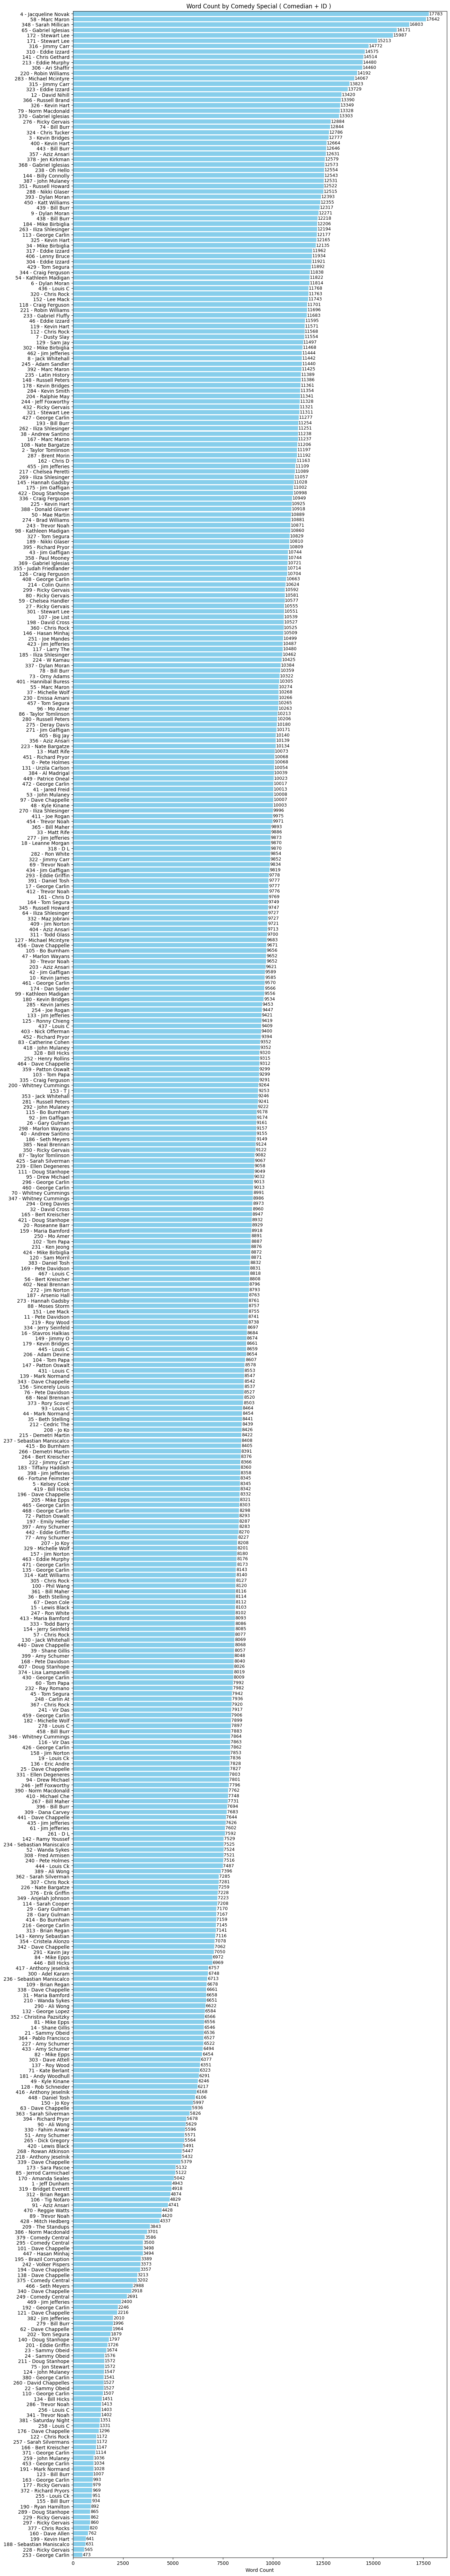

In [6]:
plt.figure(figsize=(10, 95))
bars = plt.barh(sorted_labels, sorted_counts, color='skyblue', height=0.8)
plt.xlabel('Word Count')
plt.title('Word Count by Comedy Special ( Comedian + ID ) ')

for bar in bars:
    plt.text(bar.get_width() + 10, 
             bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=9)


plt.subplots_adjust(right=1.2) 
plt.ylim(-0.5, len(sorted_labels)-0.5)
plt.show()

In [89]:
# Computing polarity values
v_obj = SentimentIntensityAnalyzer()
df['sentiment'] = df['transcript'].apply(lambda x: v_obj.polarity_scores(x))

# Creating separate columns for polarities - negative, positive, neutral
df['neg_polarity'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu_polarity'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos_polarity'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

In [90]:
# Dropping sentiment column
df.drop(['sentiment'], axis = 1, inplace = True)

In [91]:
# Computing subjectivity value
df['subjectivity'] = df['transcript'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,URL,transcript,Comedian Name,word_count,Unique ID,neg_polarity,neu_polarity,pos_polarity,compound,subjectivity
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,Pete Holmes,10068,0,0.056,0.688,0.256,1.0000,0.504545
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",Jeff Dunham,4943,1,0.062,0.673,0.264,1.0000,0.535705
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,Taylor Tomlinson,11197,2,0.077,0.717,0.206,1.0000,0.510567
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,Kevin Bridges,12777,3,0.087,0.796,0.117,0.9999,0.504952
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",Jacqueline Novak,17783,4,0.077,0.733,0.190,1.0000,0.535544


In [7]:
#df.to_csv("polarity_subjectivity_data_without_LemmStemm.csv")

In [21]:
#df = pd.read_csv("polarity_subjectivity_data_without_LemmStemm.csv")

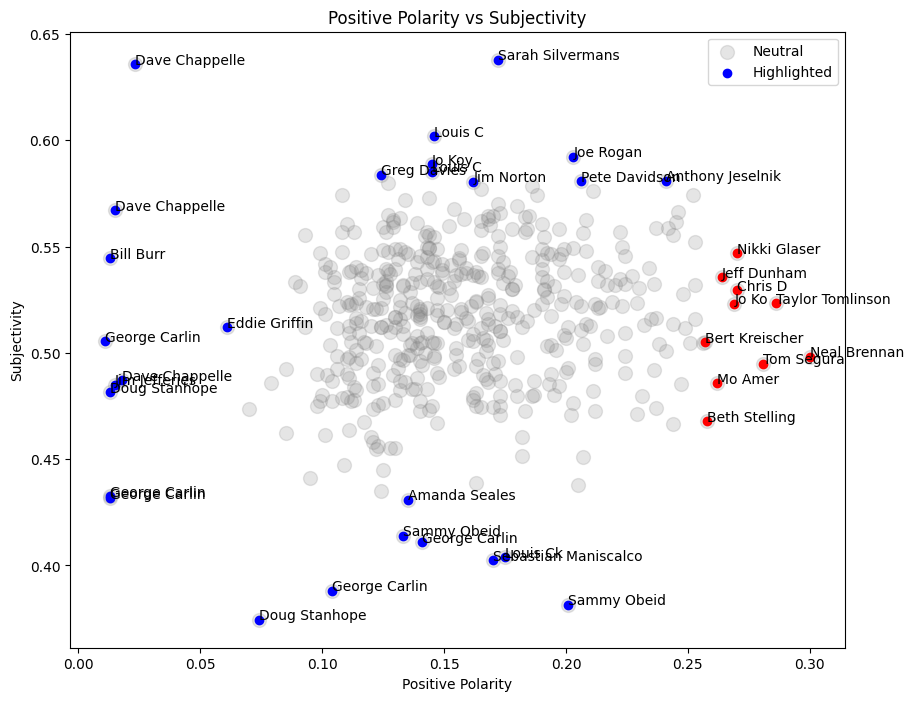

In [24]:
top_bottom = pd.concat([df.nlargest(10, 'pos_polarity'), df.nsmallest(10, 'pos_polarity'),
                        df.nlargest(10, 'subjectivity'), df.nsmallest(10, 'subjectivity')]).drop_duplicates()

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df['pos_polarity'], df['subjectivity'], color='gray', alpha=0.2, s=100, label='Neutral')

for i in top_bottom.index:
    ax.scatter(top_bottom.loc[i, 'pos_polarity'], top_bottom.loc[i, 'subjectivity'], color='red' if i in df.nlargest(10, 'pos_polarity').index else 'blue', label='Highlighted' if i in [top_bottom.index[0], top_bottom.index[-1]] else "")
    ax.annotate(top_bottom.loc[i, 'Comedian Name'], (top_bottom.loc[i, 'pos_polarity'], top_bottom.loc[i, 'subjectivity']))


ax.set_title('Positive Polarity vs Subjectivity')
ax.set_xlabel('Positive Polarity')
ax.set_ylabel('Subjectivity')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
plt.legend(by_label.values(), by_label.keys())

plt.show()